In [ ]:
import numpy as np
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_multivector
import matplotlib.pyplot as plt

In [1]:
from qiskit import QuantumCircuit

qc = QuantumCircuit(2)

qc.h(1)
qc.cx(1, 0)

In [2]:
from qiskit.quantum_info import Statevector

for s in ["00", "01", "10", "11"]:
    sv = Statevector.from_label(s).evolve(qc)
    print(f"|{s}> -> {sv}")

|00> -> Statevector([0.70710678+0.j, 0.        +0.j, 0.        +0.j,
             0.70710678+0.j],
            dims=(2, 2))
|01> -> Statevector([0.        +0.j, 0.70710678+0.j, 0.70710678+0.j,
             0.        +0.j],
            dims=(2, 2))
|10> -> Statevector([ 0.70710678+0.j,  0.        +0.j,  0.        +0.j,
             -0.70710678+0.j],
            dims=(2, 2))
|11> -> Statevector([ 0.        +0.j,  0.70710678+0.j, -0.70710678+0.j,
              0.        +0.j],
            dims=(2, 2))


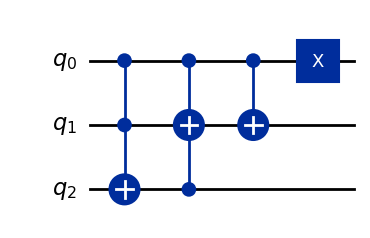

In [ ]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector

# --- 1. THIẾT KẾ MẠCH ---
# Khởi tạo mạch với 3 qubit
# Quy ước: qubit 0 là A (dây trên cùng), qubit 1 là B, qubit 2 là C
qc = QuantumCircuit(3)

# Bước 1: Tính F = C XOR (AB) -> Cổng Toffoli (Control A, B -> Target C)
qc.ccx(0, 1, 2)

# Bước 2: Bắt đầu tính E -> Cổng Toffoli (Control A, F -> Target B)
# Lưu ý: Lúc này dây 2 đang chứa giá trị F
qc.ccx(0, 2, 1)

# Bước 3: Hoàn thiện E -> Cổng CNOT (Control A -> Target B)
qc.cx(0, 1)

# Bước 4: Tính D = NOT A -> Cổng X trên A
qc.x(0)

# Vẽ mạch để kiểm tra xem có giống hình vẽ tay không
qc.draw("mpl")

In [11]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector

qc = QuantumCircuit(4)

qc.h(0)
qc.cx(0, 1)

qc.h(2)
qc.cx(2, 3)

# Vẽ mạch
qc.draw("mpl")

sv = Statevector.from_label("0000").evolve(qc)
print(sv)

Statevector([0.5+0.j, 0. +0.j, 0. +0.j, 0.5+0.j, 0. +0.j, 0. +0.j, 0. +0.j,
             0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j, 0.5+0.j, 0. +0.j,
             0. +0.j, 0.5+0.j],
            dims=(2, 2, 2, 2))
